In [2]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# import data 
deliveries = pd.read_csv("deliveries.csv")
matches = pd.read_csv("matches.csv")


In [5]:
###as 'Sunrisers Hyderabad' was earlier named as 'Deccan Chargers' now to make and 'Delhi Capitals' as 'Delhi Daredevils'
###comparisons lets update both dataframes 

deliveries = deliveries.replace('Deccan Chargers', 'Sunrisers Hyderabad')
deliveries = deliveries.replace('Delhi Daredevils', 'Delhi Capitals')
matches = matches.replace('Deccan Chargers', 'Sunrisers Hyderabad')
matches = matches.replace('Delhi Daredevils', 'Delhi Capitals')

## 1) Who will win the match SRH vs DC?

In [6]:
# get all matches between dc vs srh
srh_dc = matches[((matches.team1=='Sunrisers Hyderabad')&(matches.team2=='Delhi Capitals'))|((matches.team2=='Sunrisers Hyderabad')&(matches.team1=='Delhi Capitals'))]

print(f"Total number of matches between dc vs srh : {srh_dc.shape[0]}")

Total number of matches between dc vs srh : 26


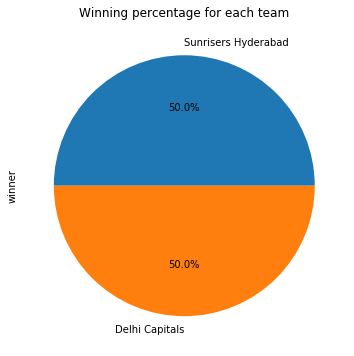

In [7]:
# calculating total wins by each team
srh_dc.winner.value_counts().plot("pie", autopct = "%1.1f%%", figsize=(20,6))
plt.title("Winning percentage for each team")
plt.show()

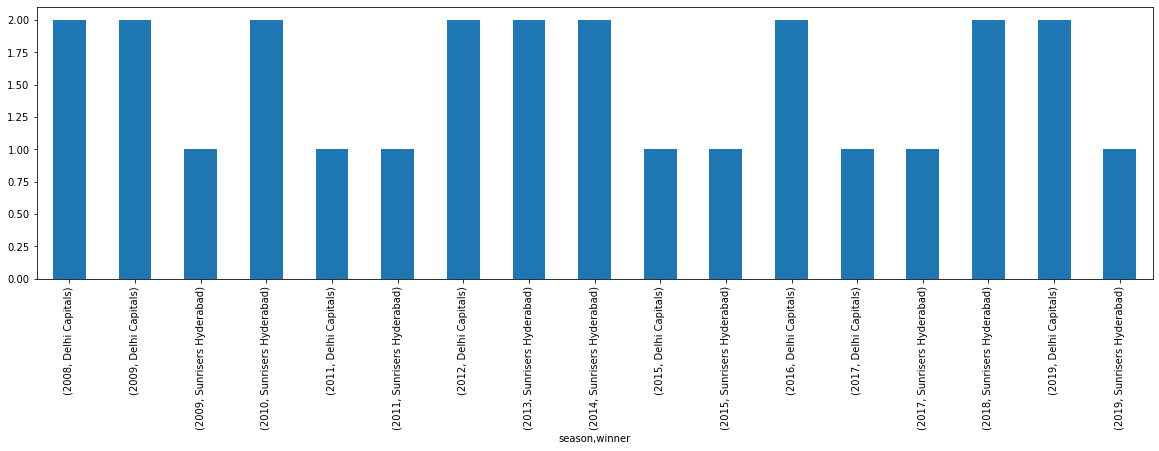

In [8]:
#checking winning percent per season
df_srh_dc = pd.DataFrame(srh_dc.groupby('season')['winner'].value_counts())
df_srh_dc['winner'].plot(kind='bar', figsize=(20,5))

**Inference:**
    SRH and dc both are playing almost similar in season 2020 also overall they have had equal chances of winning

## 2) How many runs will be scored total in the match?

count     26.000000
mean     313.538462
std       55.685711
min      161.000000
25%      287.750000
50%      320.000000
75%      350.750000
max      383.000000
Name: total_runs, dtype: float64


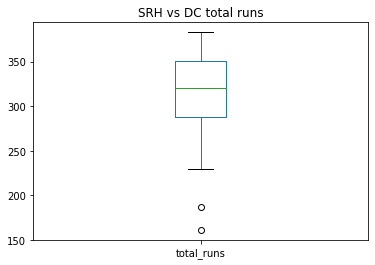

In [21]:
#getting all rows between DC and SRH
srh_dc_all = deliveries[((deliveries.batting_team=='Sunrisers Hyderabad')&(deliveries.bowling_team=='Delhi Capitals'))|((deliveries.batting_team=='Delhi Capitals')&(deliveries.bowling_team=='Sunrisers Hyderabad'))]

#getting total runs scored in a match
srh_dc_total_runs = srh_dc_all.groupby('match_id')['total_runs'].sum()

#checking basic statistics
print(srh_dc_total_runs.describe())

#checking visually
srh_dc_total_runs.plot(kind='box', title="SRH vs DC total runs");

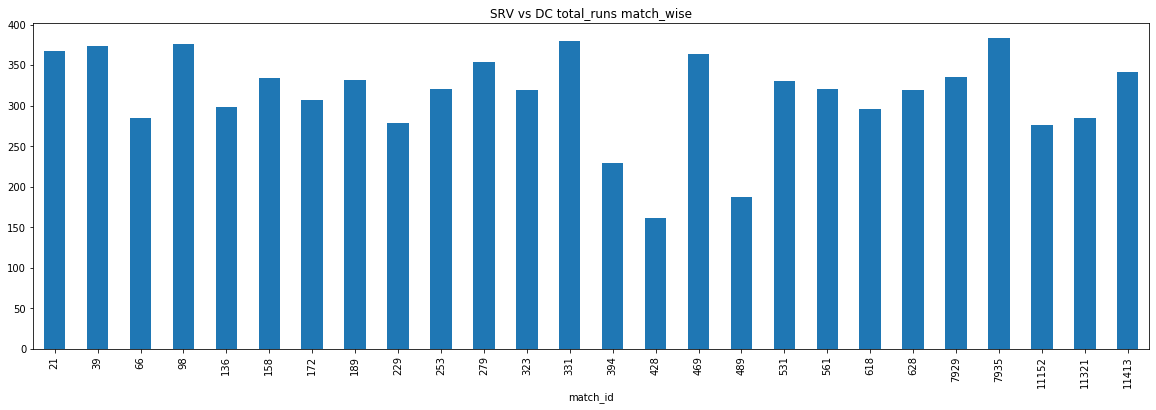

In [26]:
srh_dc_total_runs.plot(kind='bar', title='SRV vs DC total_runs match_wise', figsize=(20,6))

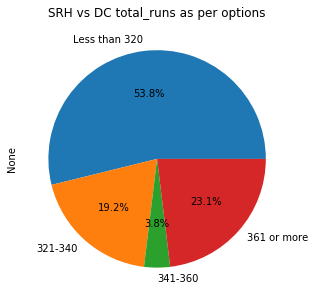

In [27]:
#checking as per options visually
pd.cut(srh_dc_total_runs.values, bins=[0,321, 341, 361, 390], labels=['Less than 320', '321-340', '341-360', '361 or more']).value_counts().plot("pie", autopct='%1.1f%%', title='SRH vs DC total_runs as per options', figsize=(20,5));

**Inference:**
    We can see that when we count total runs scored by SRH and DC in each match there is a high probability the total runs scores will be less tha 320, however we can notice next is when both teams play really well they have also scored 361 or more

## 3) How many such dismissals will occur in the match where the batsman gets out caught?

In [33]:
#getting all rows where dismissal were caught (including caught and bowled as given)
srh_dc_wickets_caught = srh_dc_all[srh_dc_all.dismissal_kind.isin(['caught', 'caught and bowled'])]

#counting such dismissals per match
srh_dc_caught_count = srh_dc_wickets_caught.groupby('match_id')['dismissal_kind'].count()

#checking basic statistics
srh_dc_caught_count.describe()

count    26.000000
mean      7.192308
std       2.623269
min       3.000000
25%       5.000000
50%       7.000000
75%       8.750000
max      13.000000
Name: dismissal_kind, dtype: float64

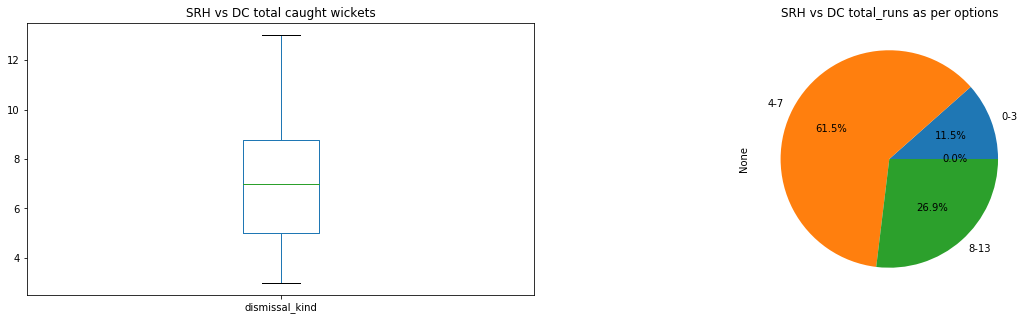

In [94]:
#checking visually
fig, ax=plt.subplots(1,2)

#checking stats plot
srh_dc_caught_count.plot(kind='box', title="SRH vs DC total caught wickets", ax=ax[0])

#checking as per options
pd.cut(srh_dc_caught_count.values, bins=[0,4, 8, 13, 20], labels=['0-3', '4-7', '8-13', '13 or more']).value_counts().plot("pie", autopct='%1.1f%%', title='SRH vs DC total_runs as per options', figsize=(20,5), ax=ax[1]);

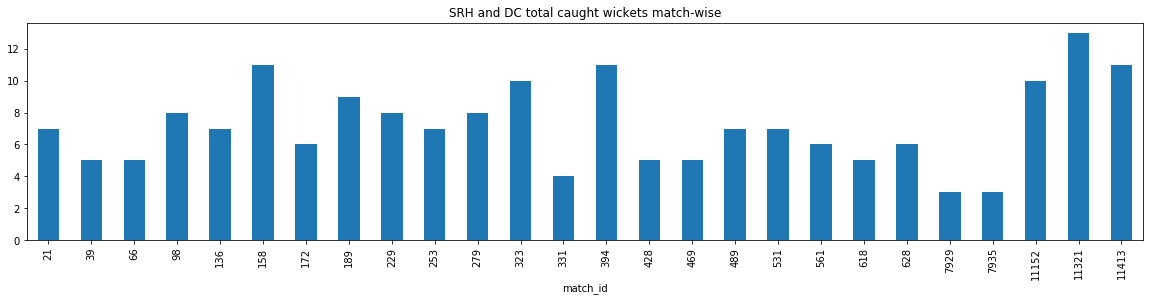

In [38]:
srh_dc_caught_count.plot(kind='bar', title='SRH and DC total caught wickets match-wise', figsize=(20,4))

**Inference:**
    - We can see un recent matches we have a higher count of wickets which were caught in total. However as per options the highest probability is to get 4-7 such wickets and next is of 7-9 . 

## 4) How many runs more/less will SRH score in the first 6 overs as compared to DC?

In [51]:
#getting all runs scored by SRH batting in first 6 overs
srhb_dcf_all = srh_dc_all[(srh_dc_all.batting_team=='Sunrisers Hyderabad')&(srh_dc_all.over.isin(range(1,7)))]

#counting runs scored by SRH in first 6 overs
srhb_dcf_runs = srhb_dcf_all.groupby('match_id')['total_runs'].sum().reset_index()
srhb_dcf_runs = srhb_dcf_runs.rename(columns={'total_runs':'runs_scored_srh'})

#getting all runs scored by DC batting in first 6 overs
dcb_srhf_all = srh_dc_all[(srh_dc_all.batting_team=='Delhi Capitals')&(srh_dc_all.over.isin(range(1,7)))]

#counting runs scored by DC in first 6 overs
dcb_srhf_runs = dcb_srhf_all.groupby('match_id')['total_runs'].sum().reset_index()
dcb_srhf_runs = dcb_srhf_runs.rename(columns={'total_runs':'runs_scored_dc'})

In [60]:
srh_dc_total_o1_6 = srhb_dcf_runs.merge(dcb_srhf_runs, on='match_id')
srh_dc_total_o1_6['difference'] = np.abs(srh_dc_total_o1_6['runs_scored_srh']- srh_dc_total_o1_6['runs_scored_dc'])

#basic statistics
srh_dc_total_o1_6.difference.describe()

count    26.000000
mean     12.115385
std       9.965247
min       1.000000
25%       4.250000
50%       9.500000
75%      15.750000
max      35.000000
Name: difference, dtype: float64

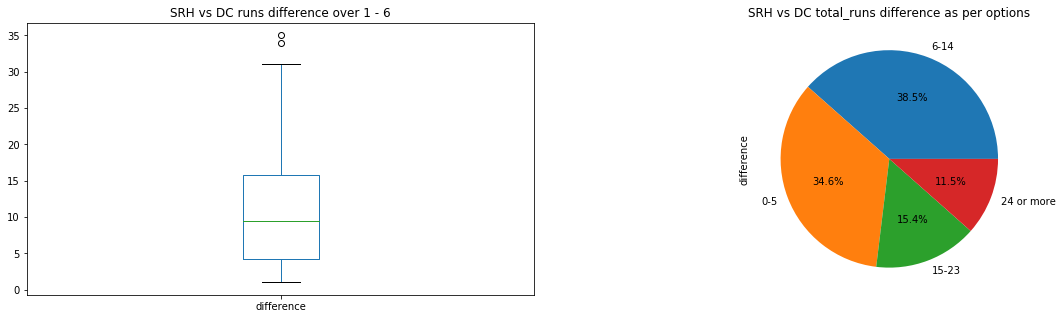

In [64]:
#checking visually
fig, ax=plt.subplots(1,2)

#checking stats plot
srh_dc_total_o1_6.difference.plot(kind='box', title="SRH vs DC runs difference over 1 - 6", ax=ax[0])

#checking as per options
pd.cut(srh_dc_total_o1_6.difference, bins=[0,6, 15, 24, 40], labels=['0-5', '6-14', '15-23', '24 or more']).value_counts().plot("pie", autopct='%1.1f%%', title='SRH vs DC total_runs difference as per options', figsize=(20,5), ax=ax[1]);

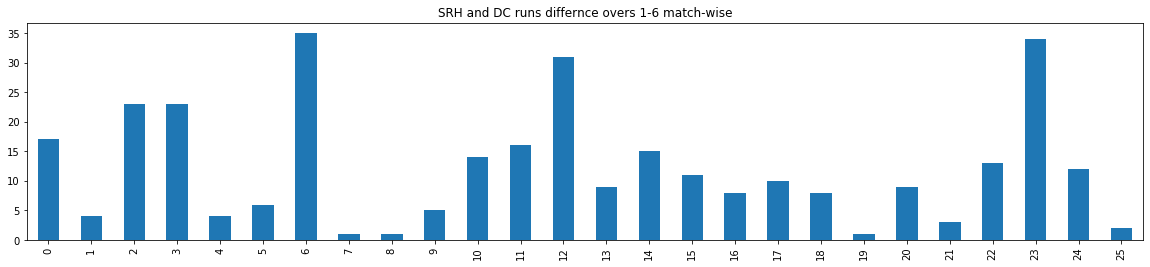

In [66]:
srh_dc_total_o1_6.difference.plot(kind='bar', title='SRH and DC runs differnce overs 1-6 match-wise', figsize=(20,4))

**Inference:**
    From the graph we can see that highest probability of difference between both teams scores is 6-14 , however sometimes both teams do well and difference is 0-5 runs.

### 5) How many extras will be bowled in total during the match by both teams? Consider all extras - byes, leg byes, no-balls, wides and penalties too?

In [89]:
#getting all rows/balls where extras were bowled
srh_dc_extra_count = srh_dc_all[(srh_dc_all['wide_runs']!=0)|(srh_dc_all['bye_runs']!=0)|(srh_dc_all['legbye_runs']!=0)|(srh_dc_all['noball_runs']!=0)|(srh_dc_all['penalty_runs']!=0)]

srh_dc_extras = srh_dc_extra_count.groupby('match_id')['extra_runs'].count()

#check basic statistics
srh_dc_extras.describe()


count    26.000000
mean     10.846154
std       3.402262
min       5.000000
25%       8.250000
50%      10.500000
75%      12.750000
max      20.000000
Name: extra_runs, dtype: float64

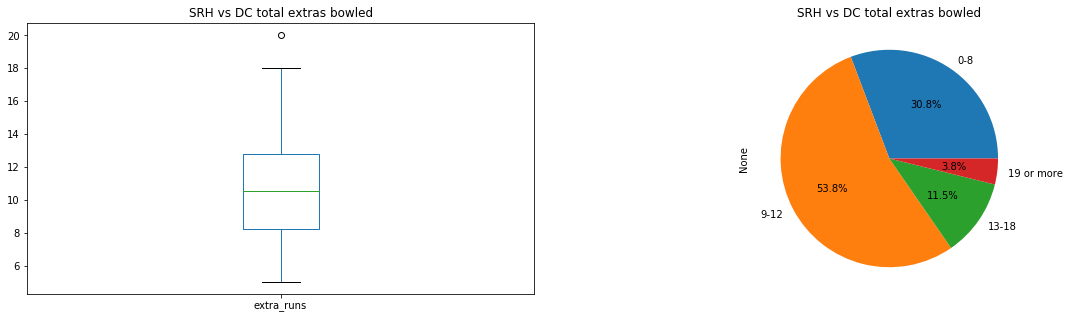

In [93]:
#checking visually
fig, ax=plt.subplots(1,2)

#checking stats plot
srh_dc_extras.plot(kind='box', title="SRH vs DC total extras bowled", ax=ax[0])

#checking as per options
pd.cut(srh_dc_extras.values, bins=[0,9 , 13, 19, 40], labels=['0-8', '9-12', '13-18', '19 or more']).value_counts().plot("pie", autopct='%1.1f%%', title='SRH vs DC total extras bowled', figsize=(20,5), ax=ax[1]);

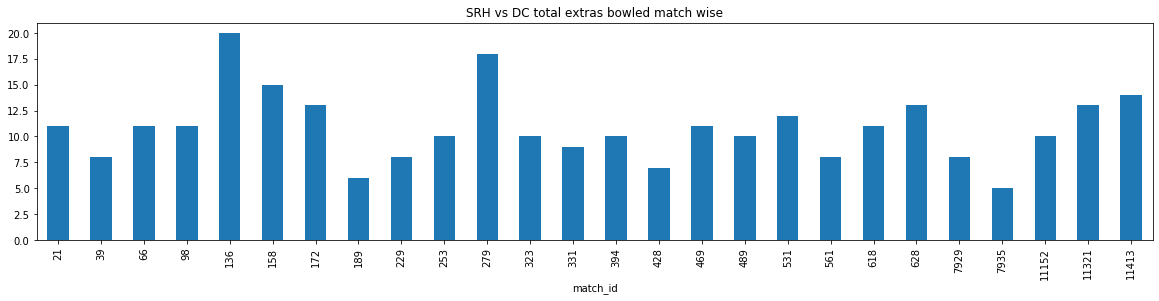

In [92]:
srh_dc_extras.plot(kind='bar', title='SRH vs DC total extras bowled match wise', figsize=(20,4))

**Inference:**
    From the historic data we can see that overall extra bowls bowled per match will be 9-14 which is the highest probability and lesser probability is for 0-8 extra bowls. Hoever as per 2020 season their is a high chance that total extra runs scored will 13-18 bowled.